In [1]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as snst
from tslearn.datasets import UCR_UEA_datasets
import tensorflow as tf 

/home/jacqueline/.local/share/virtualenvs/TSInterpret-x4eqnPOt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-09-18 14:08:21.084927: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 14:08:21.806931: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Parameters

In [2]:
dataset='BasicMotions'#'GunPoint'

# Load Data

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)


In [4]:
import sklearn
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(train_y.reshape(-1,1))#pickle.load(open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))
train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

/home/jacqueline/.local/share/virtualenvs/TSInterpret-x4eqnPOt/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model Training

In [5]:
import tensorflow as tf 


#model = Classifier_CNN(f'./ClassificationModels/models/{dataset}', (train_x.shape[1], train_x.shape[2]), train_y.shape[-1], True)
#y_true = np.argmax(test_y, axis=1)
#model.fit(train_x,train_y,test_x,test_y)

model_to_explain = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/{dataset}best_model.hdf5')

2023-09-18 14:08:22.758550: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-18 14:08:22.759033: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Explanation Algo

In [6]:
from TSInterpret.InterpretabilityModels.Saliency.TSR import TSR
int_mod=TSR(model_to_explain, train_x.shape[-2],train_x.shape[-1], method='IG',mode='time')

Mode in TF Saliency time


In [7]:
print(np.array([test_x[0,:,:]]).shape)

(1, 100, 6)


In [8]:
item= np.array([test_x[0,:,:]])
label=int(np.argmax(test_y[0]))


In [9]:
label

2

In [10]:
exp=int_mod.explain(item,labels=label,TSR =True)

time mode


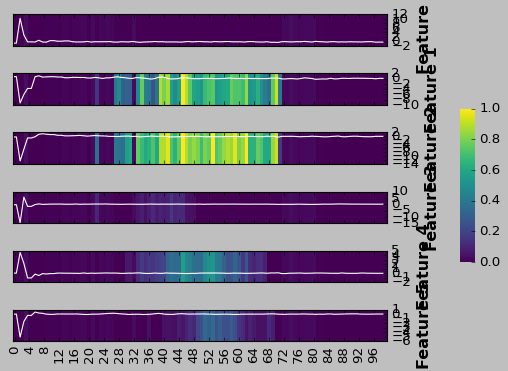

In [11]:
%matplotlib inline  
int_mod.plot(np.array([test_x[0,:,:]]),exp)

time mode


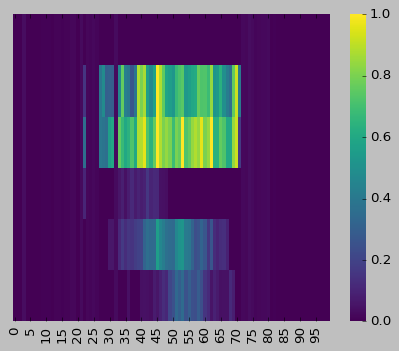

In [12]:
%matplotlib inline  
int_mod.plot(np.array([test_x[0,:,:]]),exp, heatmap = True)